In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv("train.csv",index_col='PassengerId')

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#df.info()
#df.isnull().sum()
#df.describe()

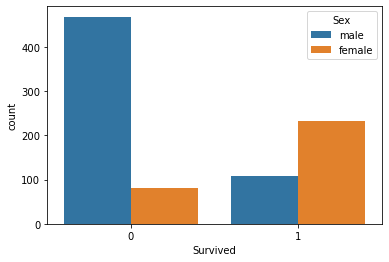

In [55]:

sns.countplot(df['Survived'],hue=df['Sex'])

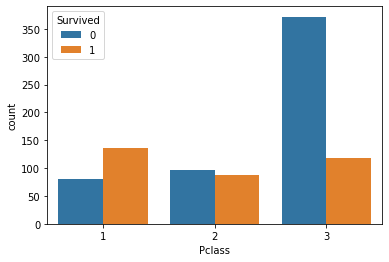

In [56]:
sns.countplot(df['Pclass'],hue=df['Survived'])

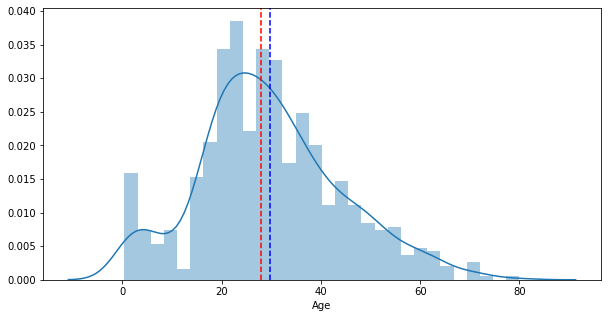

In [57]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'].dropna(),bins=30)
median=df['Age'].median()
mean=df['Age'].mean()

plt.axvline(mean,color='b', linestyle='--')
plt.axvline(median,color='r', linestyle='--')

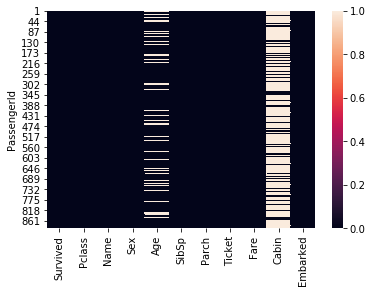

In [58]:
#plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

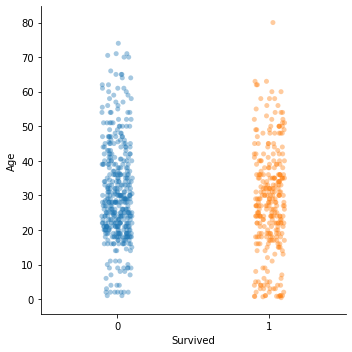

In [59]:
sns.catplot(y='Age',x='Survived',data=df,alpha=0.4)

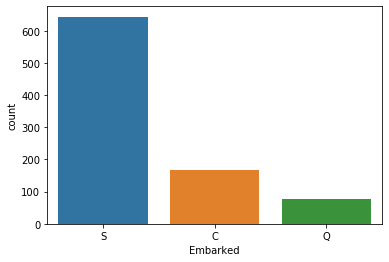

In [60]:
sns.countplot(df['Embarked'])

In [61]:
df['Embarked']=df['Embarked'].apply(lambda x:'S' if x is np.nan else x)

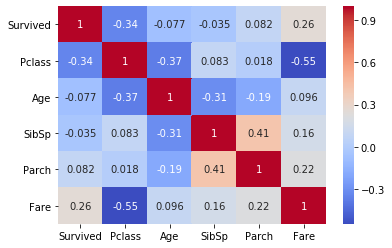

In [62]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [63]:
p1=round(df[df['Pclass']==1]['Age'].median())
p2=round(df[df['Pclass']==2]['Age'].median())
p3=round(df[df['Pclass']==3]['Age'].median())

In [64]:
def calAge(cols):
    age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(age):
        if Pclass==1:
            return p1
        elif Pclass==2:
            return p2
        else:
            return p3
    else :
        return age

In [65]:
df['Age']=df[['Age','Pclass']].apply(calAge,axis=1)

In [66]:
df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    24.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [89]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,1,0,1,0,1
888,1,19.0,0,0,30.0000,0,0,0,0,1
889,0,24.0,1,2,23.4500,0,1,0,0,1


In [91]:
#df.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)

In [92]:
#df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [93]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,1,1,0,1


# Train Test Split

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [113]:
X=df.drop('Survived',axis=1).values
y=df['Survived'].values

In [114]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [115]:
X_train

array([[0.04498618, 0.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.2963056 , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.00728826, 0.125     , 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50992712, 0.25      , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.17064589, 0.125     , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.        , 0.16666667, ..., 1.        , 0.        ,
        1.        ]])

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model = LogisticRegression()
#model=RandomForestClassifier()
#model=SVC()
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [120]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
predictions = model.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       170
           1       0.70      0.80      0.75        98

    accuracy                           0.80       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268



In [122]:
print (classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       173
           1       0.68      0.80      0.74        95

    accuracy                           0.80       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268



In [123]:
print (confusion_matrix(predictions,y_test))

[[138  35]
 [ 19  76]]


# Adding test data

In [765]:
model=LogisticRegression()
model.fit(df.drop('Survived',axis=1),df['Survived'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [766]:
test=pd.read_csv('test.csv')

In [767]:
test.drop('Cabin',axis=1,inplace=True)

In [768]:
p1=round(test[test['Pclass']==1]['Age'].mean())
p2=round(test[test['Pclass']==2]['Age'].mean())
p3=round(test[test['Pclass']==3]['Age'].mean())

In [769]:
def calAge(cols):
    age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(age):
        if Pclass==1:
            return p1
        elif Pclass==2:
            return p2
        else:
            return p3
    else :
        return age

In [770]:
test['Age']=test[['Age','Pclass']].apply(calAge,axis=1)

In [771]:
test.drop(['Name','Ticket'],inplace=True,axis=1)

In [772]:
test=test.fillna(test['Fare'].mean())

In [773]:
test=pd.get_dummies(test,prefix=['Sex','Embarked'],drop_first=True)

In [774]:
print(test.columns)
print(df.columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [775]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [776]:
#test_scale=scaler.transform(test.drop('PassengerId',axis=1))

In [777]:
test_predictions=model.predict(test.drop('PassengerId',axis=1))

In [778]:
test_predictions=pd.DataFrame(test_predictions)

In [779]:
test_predictions.columns=['Survived']

In [780]:
test_predictions['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

In [781]:
results=pd.concat([test,test_predictions],axis=1)

In [782]:
results

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1,0
414,1306,1,39.0,0,0,108.9000,0,0,0,1
415,1307,3,38.5,0,0,7.2500,1,0,1,0
416,1308,3,24.0,0,0,8.0500,1,0,1,0


In [784]:
results[['PassengerId','Survived']].to_csv("result4.csv",index=False)

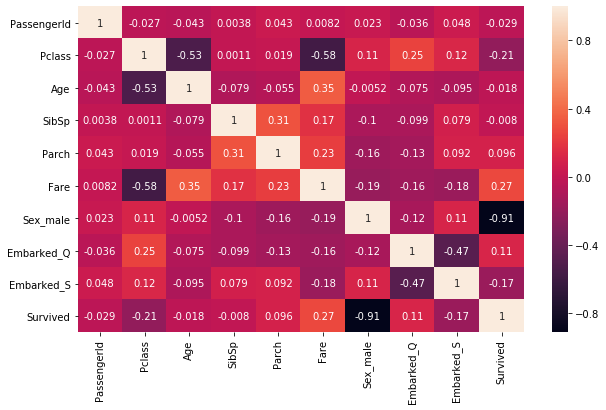

In [785]:
plt.figure(figsize=(10,6))
sns.heatmap(results.corr(),annot=True)

In [786]:
results.corr()['Survived'].sort_values()

Sex_male      -0.912260
Pclass        -0.210440
Embarked_S    -0.174752
PassengerId   -0.028748
Age           -0.018142
SibSp         -0.008025
Parch          0.096115
Embarked_Q     0.113667
Fare           0.273117
Survived       1.000000
Name: Survived, dtype: float64

# Tensorflow

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()
X_train.shape
X_train

array([[0.04498618, 0.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.2963056 , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.00728826, 0.125     , 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50992712, 0.25      , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.17064589, 0.125     , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.        , 0.16666667, ..., 1.        , 0.        ,
        1.        ]])

In [127]:
model.add(Dense(8,activation='relu'))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.35))


model.add(Dense(1,activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='SGD')
model.compile(loss='binary_crossentropy', optimizer='adam')


early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )

Train on 623 samples, validate on 268 samples
Epoch 1/600


In [867]:
model_loss=pd.DataFrame(model.history.history)

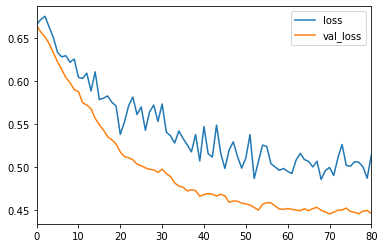

In [868]:
model_loss.plot()

In [869]:
predictions=model.predict_classes(X_test)

In [870]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       186
           1       0.62      0.84      0.72        82

    accuracy                           0.79       268
   macro avg       0.77      0.81      0.78       268
weighted avg       0.83      0.79      0.80       268



In [855]:
print(confusion_matrix(predictions,y_test))

[[144  38]
 [ 13  73]]
